In [22]:
import os
from os.path import dirname
import numpy as np
from scipy.signal import find_peaks
from scipy.stats import sem
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

# Displacement threshold for immobile molecules
immobile_stepsize_threshold_nm = 30
# alpha component threshold for constrained diffusion
threshold_alpha = 0.7

label_1 = "20 nm beads"
label_2 = "200 nm beads"
color_1 = "#9a3324"
color_2 = "#333232"
palette = [color_1, color_2]

postfix = "20vs200nmbeads_in_buffer.png"

folder_save = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig2_nanodomains/beads_and_RNA_control/"
fname_AIO_1 = "SPT_results_AIO_concat-20nm_beads_in_buffer.csv"
fname_AIO_2 = "SPT_results_AIO_concat-200nm_beads_in_buffer.csv"
fname_saspt_1 = "saSPT-pooled-mobile-20nm_beads_in_buffer.csv"
fname_saspt_2 = "saSPT-pooled-mobile-200nm_beads_in_buffer.csv"

## Combine dataframes

In [23]:
os.chdir(folder_save)

df1 = pd.read_csv(fname_AIO_1)
df2 = pd.read_csv(fname_AIO_2)

df1.insert(0, "label", np.repeat(label_1, df1.shape[0]))
df2.insert(0, "label", np.repeat(label_2, df2.shape[0]))

# Below sequence is important for the layer order
df_AIO = pd.concat([df1, df2], ignore_index=True)
print(label_1, df1.shape[0])
print(label_2, df2.shape[0])

20 nm beads 3854
200 nm beads 3383


In [24]:
df1 = pd.read_csv(fname_saspt_1, dtype=float)
df2 = pd.read_csv(fname_saspt_2, dtype=float)


def extract_log10D_density(df_current_file):
    range_D = df_current_file["diff_coef"].unique()
    log10D_density = []
    for log10D in range_D:
        df_current_log10D = df_current_file[df_current_file["diff_coef"] == log10D]
        log10D_density.append(df_current_log10D["mean_posterior_occupation"].sum())

    df_toplot = pd.DataFrame(
        {"log10D": np.log10(range_D), "Probability": log10D_density}, dtype=float
    )

    return df_toplot


df_saspt_1 = extract_log10D_density(df1)
df_saspt_2 = extract_log10D_density(df2)

df_saspt_1.insert(0, "label", np.repeat(label_1, df_saspt_1.shape[0]))
df_saspt_2.insert(0, "label", np.repeat(label_2, df_saspt_2.shape[0]))

# Below sequence is important for the layer order
df_saspt = pd.concat([df_saspt_1, df_saspt_2], ignore_index=True)

# Plots

### Localization error

268.4619408371871 2.7392983958788997
149.83443605179266 1.9997711181157327


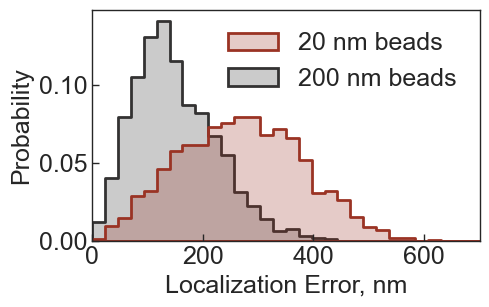

In [25]:
fontsize = 18
data = df_AIO[df_AIO["mean_stepsize_nm"] > immobile_stepsize_threshold_nm]
data = data[data["linear_fit_R2"] > 0.7]
# quantile = np.quantile(df_AIO["linear_fit_sigma"].dropna().to_numpy(), 0.999)
plt.figure(figsize=(5, 3))
ax = sns.histplot(
    data=data,
    x="linear_fit_sigma",
    hue="label",
    palette=palette,
    bins=30,
    binrange=(0, 700),
    stat="probability",
    common_norm=False,
    element="step",
    lw=2,
)
plt.xlim(0, 700)
sns.move_legend(
    ax,
    0,
    title=None,
    frameon=False,
    fontsize=fontsize,
)
plt.xlabel("Localization Error, nm", fontsize=fontsize)
plt.ylabel("Probability", fontsize=fontsize)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=fontsize)
plt.savefig("1.LocError_histo_" + postfix, format="png", bbox_inches="tight", dpi=300)
print(data[data["label"]==label_1]["linear_fit_sigma"].mean(), sem(data[data["label"]==label_1]["linear_fit_sigma"].dropna()))
print(data[data["label"]==label_2]["linear_fit_sigma"].mean(), sem(data[data["label"]==label_2]["linear_fit_sigma"].dropna()))

### Mean Step Size (whether static molecule)

749.8750907755872 3.197935094601675
340.30636785089825 1.5448321773909757
20 nm beads 3139
200 nm beads 2915


2915

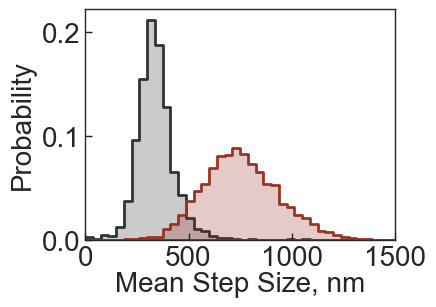

In [26]:
fontsize = 20
plt.figure(figsize=(4, 3))
ax = sns.histplot(
    data=df_AIO,
    x="mean_stepsize_nm",
    hue="label",
    palette=palette,
    bins=40,
    stat="probability",
    common_norm=False,
    binrange=(0, 1500),
    lw=2,
    element="step",
    legend=False,
)
plt.xlim(0, 1500)
# sns.move_legend(ax, 0, title=None, frameon=False, fontsize=fontsize)
# plt.axvline(immobile_stepsize_threshold_nm - 4, ls="--", color="#333232", lw=1.6)
# plt.axvline(immobile_stepsize_threshold_nm + 4, ls="--", color="#f7b801", lw=1.6)
plt.xlabel("Mean Step Size, nm", fontsize=fontsize, labelpad=0)
plt.ylabel("Probability", fontsize=fontsize)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=fontsize)
plt.savefig(
    "2.mean_stepsize_nm_histo_" + postfix, format="png", bbox_inches="tight", dpi=300
)
print(data[data["label"] == label_1]["mean_stepsize_nm"].mean(), sem(data[data["label"] == label_1]["mean_stepsize_nm"].dropna()))
print(data[data["label"] == label_2]["mean_stepsize_nm"].mean(), sem(data[data["label"] == label_2]["mean_stepsize_nm"].dropna()))
print(label_1, data[data["label"] == label_1].shape[0])
print(label_2, data[data["label"] == label_2].shape[0])
data[data["label"] == label_2].shape[0]

### alpha distribution

0.980403363244253 0.006268673871717843
1.0394735867538965 0.005794102482974263
20 nm beads 3203
200 nm beads 3052


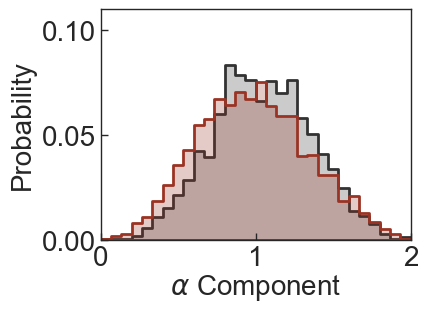

In [27]:
fontsize = 20
plt.figure(figsize=(4, 3))
data = df_AIO[df_AIO["mean_stepsize_nm"] > immobile_stepsize_threshold_nm]
data = data[data["loglog_fit_R2"] > 0.7]
data = data[data["alpha"] > 0]
ax = sns.histplot(
    data=data,
    x="alpha",
    hue="label",
    palette=palette,
    bins=30,
    stat="probability",
    common_norm=False,
    binrange=(0, 2),
    lw=2,
    element="step",
    legend=False,
)
# plt.axvline(threshold_alpha - 0.005, ls="--", color="#f7b801")
# plt.axvline(threshold_alpha + 0.005, ls="--", color="#87a878")
plt.xlim(0, 2)
plt.ylim(0, 0.11)
plt.ylabel("Probability", fontsize=fontsize)
plt.xlabel(r"$\alpha$ Component", fontsize=fontsize, labelpad=0)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=fontsize)
plt.savefig("3.alpha_histo_" + postfix, format="png", bbox_inches="tight", dpi=300)
print(data[data["label"] == label_1]["alpha"].mean(), sem(data[data["label"]==label_1]["alpha"].dropna()))
print(data[data["label"] == label_2]["alpha"].mean(), sem(data[data["label"]==label_2]["alpha"].dropna()))
print(label_1, data[data["label"] == label_1].shape[0])
print(label_2, data[data["label"] == label_2].shape[0])

### Angle Distribution

91.91667128707542 0.3319099294320363
82.8880638494955 0.25843240081182683


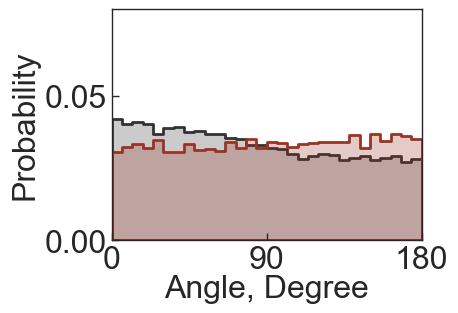

In [28]:
fontsize = 23
lst_angle = []
lst_label = []
for _, row in df_AIO[
    df_AIO["mean_stepsize_nm"] > immobile_stepsize_threshold_nm
].iterrows():
    angles = np.fromstring(
        row["list_of_angles"][1:-1],
        dtype=float,
        sep=", ",
    )
    labels = np.repeat(row["label"], angles.shape[0])
    lst_angle.extend(angles)
    lst_label.extend(labels)

data = pd.DataFrame(
    {
        "angle": np.abs(lst_angle),
        "label": lst_label,
    },
    dtype=object,
)

plt.figure(figsize=(4, 3))
bins = 30
ax = sns.histplot(
    data=data,
    x="angle",
    hue="label",
    palette=palette,
    bins=bins,
    stat="probability",
    common_norm=False,
    binrange=(0, 180),
    lw=2,
    element="step",
    legend=False,
)
# plt.axhline(1 / bins - 0.0004, color="#87a878", ls="--")
# plt.axhline(1 / bins + 0.0004, color="#f7b801", ls="--")
# plt.axhline(1 / bins, color="gray", ls="--", lw=2)
plt.xlim(0, 180)
plt.xticks([0, 90, 180])
plt.ylim(0, 0.08)
plt.ylabel("Probability", fontsize=fontsize)
plt.xlabel("Angle, Degree", fontsize=fontsize, labelpad=0)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=fontsize)
plt.savefig("4.angle_histo_" + postfix, format="png", bbox_inches="tight", dpi=300)
print(data[data["label"]==label_1]["angle"].mean(), sem(data[data["label"]==label_1]["angle"].dropna()))
print(data[data["label"]==label_2]["angle"].mean(), sem(data[data["label"]==label_2]["angle"].dropna()))

### D distribution among the non contrained molecules

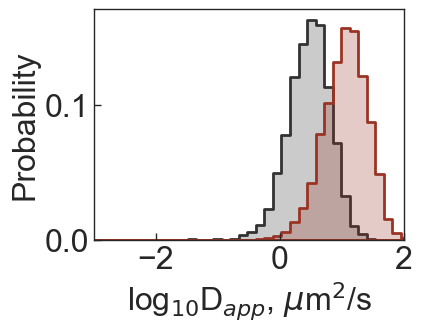

20 nm beads 3139
200 nm beads 2915


In [29]:
fontsize = 23
data = df_AIO[df_AIO["linear_fit_R2"] > 0.7]
data = data[data["mean_stepsize_nm"] > immobile_stepsize_threshold_nm]
# data = data[data["alpha"] > 0.5]
plt.figure(figsize=(4, 3))
ax = sns.histplot(
    data=data,
    x="linear_fit_log10D",
    hue="label",
    palette=palette,
    bins=40,
    stat="probability",
    common_norm=False,
    binrange=(-3, 2.5),
    element="step",
    lw=2,
    legend=False,
)
plt.xlim(-3, 2)
plt.xlabel(r"log$_{10}$D$_{app}$, $\mu$m$^2$/s", fontsize=fontsize)
plt.ylabel("Probability", fontsize=fontsize)
# plt.gca().yaxis.set_label_coords(-0.1, 0.3)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=fontsize)
plt.savefig(
    "5.ApparentD_linear_histo_" + postfix, format="png", bbox_inches="tight", dpi=300
)
plt.show()
print(label_1, data[data["label"] == label_1].shape[0])
print(label_2, data[data["label"] == label_2].shape[0])

### Plot saSPT

In [30]:
df1 = pd.read_csv(fname_saspt_1, dtype=float)
df2 = pd.read_csv(fname_saspt_2, dtype=float)

def extract_log10D_density(df_current_file):
    range_D = df_current_file["diff_coef"].unique()
    log10D_density = []
    for log10D in range_D:
        df_current_log10D = df_current_file[df_current_file["diff_coef"] == log10D]
        log10D_density.append(df_current_log10D["mean_posterior_occupation"].sum())

    df_toplot = pd.DataFrame(
        {"log10D": np.log10(range_D), "Probability": log10D_density}, dtype=float
    )

    return df_toplot


df_saspt_1 = extract_log10D_density(df1)
df_saspt_2 = extract_log10D_density(df2)

df_saspt_1.insert(0, "label", np.repeat(label_1, df_saspt_1.shape[0]))
df_saspt_2.insert(0, "label", np.repeat(label_2, df_saspt_2.shape[0]))

# Below sequence is important for the layer order
df_saspt = pd.concat([df_saspt_1, df_saspt_2], ignore_index=True)

In [31]:
df_saspt_1["log10D"].max(), df_saspt_1["log10D"].min(), df_saspt_2[
    "log10D"
].max(), df_saspt_2["log10D"].min()

(2.5, -2.0, 2.5, -2.0)

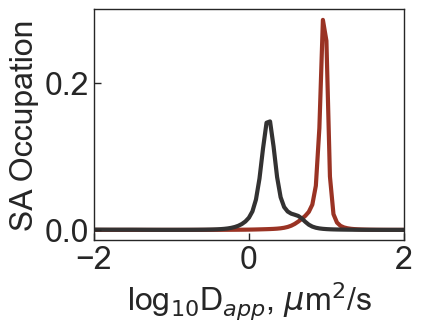

In [41]:
fontsize = 23
plt.figure(figsize=(4, 3))
data = df_saspt
data["102"] = data["Probability"].to_numpy(float) * 100
ax = sns.lineplot(
    data=data,
    x="log10D",
    y="Probability",
    hue="label",
    palette=palette,
    lw=3,
    legend=False,
)

# plt.axvline(
#     0.955, color="#FF4F00", ls="--", lw=3
# )  # 20 nm beads in solution saSPT peak position

log10D = df_saspt["log10D"].to_numpy(dtype=float)

# sns.move_legend(ax, 2, title=None, frameon=False)
plt.xlim(log10D.min(), log10D.max())
# plt.ylim(0, 0.025)
# plt.yticks([0, 1, 2])
plt.xlim(-2, 2)
plt.xlabel(r"log$_{10}$D$_{app}$, $\mu$m$^2$/s", fontsize=fontsize)
plt.ylabel("SA Occupation", fontsize=fontsize)
# plt.gca().yaxis.set_label_coords(-0.13, 0.3)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="out",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().yaxis.get_offset_text().set_fontsize(15)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.savefig("6.saspt_histo_" + postfix, format="png", bbox_inches="tight", dpi=300)
plt.show()

In [33]:
from scipy.signal import find_peaks


def find_major_peak(x, y):
  """
  Finds the x value corresponding to the major peak (highest value) in the y data.

  Args:
      x: A 1D NumPy array representing the x-axis values.
      y: A 1D NumPy array representing the y-axis values (curve).

  Returns:
      A tuple containing the x value and the corresponding y value of the major peak, 
      or None if no peak is found.
  """
  peaks, _ = find_peaks(y)
  # If no peaks are found, return None
  if len(peaks) == 0:
    return None

  # Find the index of the major peak (highest value in y)
  major_peak_index = peaks[np.argmax(y[peaks])]
  major_peak_x = x[major_peak_index]
  major_peak_y = y[major_peak_index]

  return major_peak_x, major_peak_y


major_peak_x, major_peak_y = find_major_peak(
    data[data["label"] == label_1]["log10D"].to_numpy(float),
    data[data["label"] == label_1]["Probability"].to_numpy(float),
)
print(label_1, 10**major_peak_x)
major_peak_x, major_peak_y = find_major_peak(
    data[data["label"] == label_2]["log10D"].to_numpy(float),
    data[data["label"] == label_2]["Probability"].to_numpy(float),
)
print(label_2, 10**major_peak_x)

20 nm beads 9.006280202112785
200 nm beads 1.873817422860385


### Stacked bar plot of fractions

#### Calculations

In [34]:
labels = [label_1, label_2]
columns = [
    "label",
    "N, Total",
    "N, Mobile",
    "N, Constrained",
    "Static Fraction",
    "Constrained Fraction",
]
lst_rows_of_df = []
fnames = [fname_AIO_1, fname_AIO_2]

for i in range(2):
    df_current = pd.read_csv(fnames[i])
    df_current = df_current.astype(
        {"linear_fit_log10D": float, "mean_stepsize_nm": float, "alpha": float}
    )

    # all filenames within the current condition/file
    all_filenames = df_current["filename"].unique().tolist()
    # filename prefix for each replicate
    replicate_prefixs = np.unique([f for f in all_filenames])

    for prefix in replicate_prefixs:
        current_replicate_filenames = [f for f in all_filenames if prefix in f]
        df_current_replicate = df_current[
            df_current["filename"].isin(current_replicate_filenames)
        ]
        # Judege if immobile by mean step size
        df_mobile = df_current_replicate[
            df_current_replicate["mean_stepsize_nm"] >= immobile_stepsize_threshold_nm
        ]

        # Judge if constrained by alpha component
        df_constrained = df_mobile[df_mobile["alpha"] <= threshold_alpha]

        N_total = df_current_replicate.shape[0]
        N_mobile = df_mobile.shape[0]
        N_constrained = df_constrained.shape[0]

        if N_constrained < 1:
            continue

        F_immobile = (N_total - N_mobile) / N_total
        F_constrained = N_constrained / N_mobile

        # save
        lst_rows_of_df.append(
            [
                labels[i],
                N_total,
                N_mobile,
                N_constrained,
                F_immobile,
                F_constrained,
            ]
        )

data = pd.DataFrame.from_records(
    lst_rows_of_df,
    columns=columns,
)

In [35]:
data

,label,"N, Total","N, Mobile","N, Constrained",Static Fraction,Constrained Fraction
0,20 nm beads,697,697,240,0.000000,0.344333
1,20 nm beads,846,846,295,0.000000,0.348700
2,20 nm beads,1153,1153,428,0.000000,0.371206
3,20 nm beads,1158,1158,416,0.000000,0.359240
4,200 nm beads,995,995,228,0.000000,0.229146
5,200 nm beads,1004,1004,214,0.000000,0.213147
6,200 nm beads,701,701,168,0.000000,0.239658
7,200 nm beads,294,286,74,0.027211,0.258741
8,200 nm beads,389,389,90,0.000000,0.231362


In [36]:
N_total = data["N, Total"].to_numpy(int)
N_mobile = data["N, Mobile"].to_numpy(int)
N_immobile = N_total - N_mobile
N_constrained = data["N, Constrained"].to_numpy(int)
N_normal = N_mobile - N_constrained

frac_immobile = N_immobile / N_total
frac_constrained = N_constrained / N_total
frac_normal = N_normal / N_total

data["Immobile"] = frac_immobile
data["Constrained"] = frac_constrained
data["Normal"] = frac_normal

df_mean_error = pd.DataFrame(
    {
        "label": data["label"].unique(),
        "F_immobile_mean": [
            data[data["label"] == label]["Immobile"].mean()
            for label in data["label"].unique()
        ],
        "F_immobile_sem": [
            data[data["label"] == label]["Immobile"].sem()
            for label in data["label"].unique()
        ],
        "F_immobile_std": [
            data[data["label"] == label]["Immobile"].std()
            for label in data["label"].unique()
        ],
        "F_constrained_mean": [
            data[data["label"] == label]["Constrained"].mean()
            for label in data["label"].unique()
        ],
        "F_constrained_sem": [
            data[data["label"] == label]["Constrained"].sem()
            for label in data["label"].unique()
        ],
        "F_constrained_std": [
            data[data["label"] == label]["Constrained"].std()
            for label in data["label"].unique()
        ],
        "F_normal_mean": [
            data[data["label"] == label]["Normal"].mean()
            for label in data["label"].unique()
        ],
        "F_normal_sem": [
            data[data["label"] == label]["Normal"].sem()
            for label in data["label"].unique()
        ],
        "F_normal_std": [
            data[data["label"] == label]["Normal"].std()
            for label in data["label"].unique()
        ],
        "nobs": [
            data[data["label"] == label].shape[0]
            for label in data["label"].unique()
        ],  # number of observations
    },
    dtype=object,
)

In [37]:
from scipy.stats import ttest_ind_from_stats

def p_annot(p):
    """
    p-value annotation legend:
    ns: 0.05 < p <= 1
    *: 0.01 < p <= 0.05
    **: 0.001 < p <= 0.01
    ***: 0.0001 < p <= 0.001
    ****: p <= 0.0001
    """
    if p > 0.05:
        return "ns"
    elif p > 0.01:
        return "*"
    elif p > 0.001:
        return "**"
    elif p > 0.0001:
        return "***"
    else:
        return "****"


def compare2labels(label1, label2):
    print("(", label1, ") vs (", label2, "):")
    _, pval = ttest_ind_from_stats(
        mean1=df_mean_error[df_mean_error["label"] == label1][
            "F_normal_mean"
        ].squeeze(),
        std1=df_mean_error[df_mean_error["label"] == label1]["F_normal_std"].squeeze(),
        nobs1=df_mean_error[df_mean_error["label"] == label1]["nobs"].squeeze(),
        mean2=df_mean_error[df_mean_error["label"] == label2][
            "F_normal_mean"
        ].squeeze(),
        std2=df_mean_error[df_mean_error["label"] == label2]["F_normal_std"].squeeze(),
        nobs2=df_mean_error[df_mean_error["label"] == label2]["nobs"].squeeze(),
        equal_var=False,
        alternative="two-sided",
    )
    print("p value of normal fraction:", pval, p_annot(pval))
    _, pval = ttest_ind_from_stats(
        mean1=df_mean_error[df_mean_error["label"] == label1][
            "F_constrained_mean"
        ].squeeze(),
        std1=df_mean_error[df_mean_error["label"] == label1][
            "F_constrained_std"
        ].squeeze(),
        nobs1=df_mean_error[df_mean_error["label"] == label1]["nobs"].squeeze(),
        mean2=df_mean_error[df_mean_error["label"] == label2][
            "F_constrained_mean"
        ].squeeze(),
        std2=df_mean_error[df_mean_error["label"] == label2][
            "F_constrained_std"
        ].squeeze(),
        nobs2=df_mean_error[df_mean_error["label"] == label2]["nobs"].squeeze(),
        equal_var=False,
        alternative="two-sided",
    )
    print("p value of constrained fraction:", pval, p_annot(pval))
    _, pval = ttest_ind_from_stats(
        mean1=df_mean_error[df_mean_error["label"] == label1][
            "F_immobile_mean"
        ].squeeze(),
        std1=df_mean_error[df_mean_error["label"] == label1][
            "F_immobile_std"
        ].squeeze(),
        nobs1=df_mean_error[df_mean_error["label"] == label1]["nobs"].squeeze(),
        mean2=df_mean_error[df_mean_error["label"] == label2][
            "F_immobile_mean"
        ].squeeze(),
        std2=df_mean_error[df_mean_error["label"] == label2][
            "F_immobile_std"
        ].squeeze(),
        nobs2=df_mean_error[df_mean_error["label"] == label2]["nobs"].squeeze(),
        equal_var=False,
        alternative="two-sided",
    )
    print("p value of immobile fraction:", pval, p_annot(pval))

In [38]:
compare2labels(labels[0], labels[1])

( 20 nm beads ) vs ( 200 nm beads ):
p value of normal fraction: 8.147764968064513e-05 ****
p value of constrained fraction: 2.314559007515973e-06 ****
p value of immobile fraction: 0.3739009663000589 ns


#### Plot

F_immobile_mean :
label: ['20 nm beads', '200 nm beads']
fraction: [0.0 0.5442176870748299]
SEM: [0.0 0.5442176870748298]

F_constrained_mean :
label: ['20 nm beads', '200 nm beads']
fraction: [35.58695596271183 23.300278381891314]
SEM: [0.5993430319934456 0.6347053260304052]

F_normal_mean :
label: ['20 nm beads', '200 nm beads']
fraction: [64.41304403728816 76.15550393103386]
SEM: [0.5993430319934456 1.0990041127596304]



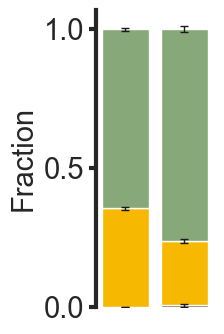

In [39]:
fig = plt.figure(figsize=(2.4, 3.5))
x = [1, 2]
colors = [
    "#333232",
    "#f7b801",
    "#87a878",
]
fontsize = 21
df_fractions = df_mean_error[df_mean_error["label"].isin(labels)]
bottom = np.zeros(len(x))
categories = ["F_immobile_mean", "F_constrained_mean", "F_normal_mean"]
for i in range(len(categories)):
    plt.bar(
        x=x,
        height=df_fractions[categories[i]],
        yerr=df_fractions[categories[i][:-4] + "sem"],
        error_kw={"elinewidth": 1},
        capsize=3,
        label=labels,
        bottom=bottom,
        color=colors[i],
    )
    print(categories[i], ":")
    print("label:", labels)
    print("fraction:", df_fractions[categories[i]].to_numpy() * 100)
    print("SEM:", df_fractions[categories[i][:-4] + "sem"].to_numpy() * 100)
    print()
    bottom += df_fractions[categories[i]]
plt.ylim(0, 1.07)
plt.ylabel("Fraction", size=fontsize)
plt.xticks([])
plt.yticks([0, 0.5, 1], size=fontsize)
plt.gca().spines[:].set_linewidth(3)
plt.gca().spines[["right", "top", "bottom"]].set_visible(False)
plt.gca().tick_params(
    axis="y",
    which="major",
    labelsize=fontsize,
    direction="out",
    bottom=True,
    left=True,
    length=5,
    width=3,
)
canvas_width = 0.5
plt.xlim(1 - canvas_width, 2 + canvas_width)
plt.xlabel("")
plt.tight_layout()
plt.savefig(
    "Fracs_compare_left_20nm_right_200nm_same20ms.png",
    format="png",
    bbox_inches="tight",
    dpi=300,
)

### Fitting R2 of all mobile molecules

In [40]:
data = df_AIO[df_AIO["max_d_anytwo_nm"] > threshold_max_d_anytwo_nm]
plt.figure(figsize=(5, 2.5), dpi=300)
ax = sns.histplot(
    data=data,
    x="linear_fit_R2",
    hue="label",
    palette=palette,
    bins=40,
    stat="probability",
    common_norm=False,
    binrange=(0, 1),
)
sns.move_legend(ax, 0, title=None, frameon=False)
plt.xlim(0, 1)
plt.xlabel(r"Fitting R$^2$", weight="bold", fontsize=15)
plt.ylabel("Probability", weight="bold", fontsize=15)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=15,
    direction="out",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.savefig("SM1.fitting_R2_histo_" + postfix, format="png", bbox_inches="tight")
plt.show()
print(label_1, data[data["label"] == label_1].shape[0])
print(label_2, data[data["label"] == label_2].shape[0])

NameError: name 'threshold_max_d_anytwo_nm' is not defined